<Figure size 640x480 with 0 Axes>

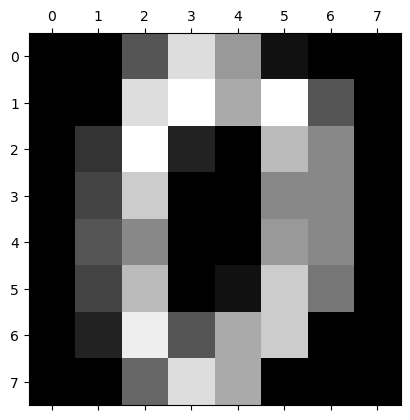

训练集上的准确率为：0.98，测试数据上的准确率为：0.95


In [2]:
# 导入数字识别数据集，这个数据集已经集成在了sklearn
from sklearn.datasets import load_digits

# 导入随机森林分类器
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 导入数据
digits = load_digits()
images = digits.images
plt.gray()
plt.matshow(images[0])
plt.show()

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 创建随机森林，参数可以修改。
clf = RandomForestClassifier(
    n_estimators=400,
    criterion="entropy",
    max_depth=5,
    min_samples_split=3,
    max_features="sqrt",
    random_state=0,
)
clf.fit(X_train, y_train)
print(
    "训练集上的准确率为：%.2f，测试数据上的准确率为：%.2f"
    % (clf.score(X_train, y_train), clf.score(X_test, y_test))
)

In [3]:
# 员工离职率预测
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
# 读取数据到pandas dataframe
df = pd.read_csv("HR_comma_sep.csv", )
# 检测是否有缺失数据
print(df.isnull().any(), "\n\n")

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool 




In [5]:
# 查看数据的样例
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# 计算离职员工的百分比和没有离职的百分比
left_rate = df["left"].value_counts() / len(df)
print("样本数据中，离职率为：%.2f\n\n" % left_rate[1])
# 显示统计数据
df.describe()

样本数据中，离职率为：0.24




,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# 将字符串类型转换为整数类型，不然后面无法计算。
df["Department"] = df["Department"].astype("category").cat.codes
df["salary"] = df["salary"].astype("category").cat.codes
# 设置特征值和标签。 X 存放特征， y存放标签
X = df.drop("left", axis=1)
y = df["left"]
# 将数据分为训练和测试数据集
# 注意参数 stratify = y 意味着在产生训练和测试数据中，
# 离职的员工的百分比等于原来总的数据中的离职的员工的百分比
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [9]:
# 训练模型
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# 训练决策树
dtree = tree.DecisionTreeClassifier(
    # TODO 1：编写代码实现各种参数的选择和设置
    criterion="gini",
    max_depth=None,
    min_samples_leaf=5,
    min_samples_split=5,
    random_state=42,
)
dtree = dtree.fit(X_train, y_train)
print("\n\n --﹣决策树﹣--")
print(classification_report(y_test, dtree.predict(X_test)))

# 训练随机森林
rf = RandomForestClassifier(
    # TODO 2：编写代码实现各种参数的选择和设置
    n_estimators=1000,
    criterion="gini",
    max_depth=None,
    min_samples_leaf=5,
    min_samples_split=5,
    random_state=42,
)
rf.fit(X_train, y_train)
print("\n\n --﹣随机森林﹣--")
print(classification_report(y_test, rf.predict(X_test)))



 --﹣决策树﹣--
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1714
           1       0.97      0.94      0.95       536

    accuracy                           0.98      2250
   macro avg       0.97      0.96      0.97      2250
weighted avg       0.98      0.98      0.98      2250



 --﹣随机森林﹣--
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1714
           1       0.99      0.92      0.95       536

    accuracy                           0.98      2250
   macro avg       0.98      0.96      0.97      2250
weighted avg       0.98      0.98      0.98      2250

